In [0]:
import tensorflow as tf



In [0]:

# To use tensorflow functions and to simplify use of them (ie avoid explicitly creating session object)
# https://stackoverflow.com/questions/52747947/tensorflow-read-file-does-nothing
# This must be first cell run - seems good to get used to as TF2.0 is expected to have EE as default
tf.enable_eager_execution()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from os import getcwd, chdir
import pathlib
path = '/content/gdrive/Shared drives/IDS594/'
data_root = path + 'seg_train'
chdir(path)
print(getcwd())

/content/gdrive/Shared drives/IDS594


In [0]:
# Only run if data hasn't aleady been unzipped
# It won't hurt anything, it will just take time and replace the unzipped files

# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
#file_names = ['seg_train','seg_test','seg_pred']

file_names = ['seg_train']
  
# opening the zip files in READ mode, only if target extract dir doesn't exist
for file_name in file_names:
  dir_exists = pathlib.Path(path+file_name).exists()
  if not(dir_exists):
    with ZipFile(file_name+'.zip', 'r') as zip:
      zip.extractall() 

In [0]:
# Following tutorial here: https://www.tensorflow.org/tutorials/load_data/images
data_root = pathlib.Path(getcwd()+'/seg_train')
print(data_root)
print(type(data_root))
for item in data_root.iterdir():
  print(item)

/content/gdrive/Shared drives/IDS594/seg_train
<class 'pathlib.PosixPath'>
/content/gdrive/Shared drives/IDS594/seg_train/buildings
/content/gdrive/Shared drives/IDS594/seg_train/forest
/content/gdrive/Shared drives/IDS594/seg_train/glacier
/content/gdrive/Shared drives/IDS594/seg_train/mountain
/content/gdrive/Shared drives/IDS594/seg_train/sea
/content/gdrive/Shared drives/IDS594/seg_train/street


In [0]:
import random
# create list of all image paths under data_root in 'pathlib.PosixPath' type
all_image_paths = list(data_root.glob('*/*'))
print(type(all_image_paths[0]))
print(all_image_paths[0])
# convert path list from 'pathlib.PosixPath' type to string
all_image_paths = [str(path) for path in all_image_paths]
print(type(all_image_paths[0]))
print(all_image_paths[0])
# shuffle up image paths. This is mostly to view a variety of images during data
# investigation. Final dataset will be shuffled again during training
random.seed(0)
random.shuffle(all_image_paths) 

image_count = len(all_image_paths)
image_count

<class 'pathlib.PosixPath'>
/content/gdrive/Shared drives/IDS594/seg_train/buildings/1940.jpg
<class 'str'>
/content/gdrive/Shared drives/IDS594/seg_train/buildings/1940.jpg


14034

In [0]:
all_image_paths[:10] # Verify paths are as expected

['/content/gdrive/Shared drives/IDS594/seg_train/mountain/14844.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/street/37.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/sea/11107.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/forest/6824.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/sea/582.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/sea/14879.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/forest/10346.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/buildings/2170.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/buildings/2069.jpg',
 '/content/gdrive/Shared drives/IDS594/seg_train/buildings/17065.jpg']

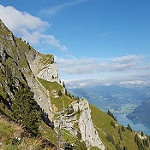

/content/gdrive/Shared drives/IDS594/seg_train/mountain/4862.jpg



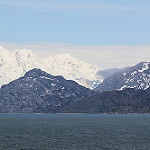

/content/gdrive/Shared drives/IDS594/seg_train/glacier/12524.jpg



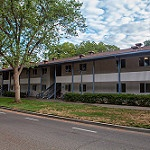

/content/gdrive/Shared drives/IDS594/seg_train/buildings/1311.jpg



In [0]:
# Review random images and paths

import IPython.display as display
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(image_path)
  print()

In [0]:
# Extract and sort labels from image folder structure
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [0]:
# Use dictionary comprehension to create a dict of k=label names, v=integer extracted from tuples generated by enumerate
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [0]:
# Create list of integer labels using list comprehension and pathlib to extract label names from
# path structure and remap to integer label
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [3, 5, 4, 1, 4, 4, 1, 0, 0, 0]


In [0]:
# Inspect the first element in all_image_path list
img_path = all_image_paths[0]
img_path

'/content/gdrive/Shared drives/IDS594/seg_train/mountain/14844.jpg'

In [0]:

img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")
print(img_raw)

NameError: ignored

In [0]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)
img_tensor = tf.cast(img_tensor, tf.float32)
print(img_tensor.shape)
print(img_tensor.dtype)

<unknown>
<dtype: 'uint8'>
<unknown>
<dtype: 'float32'>


In [0]:
# Requires eager execute to be useful
#img_final = tf.image.resize(img_tensor, [150, 150])
img_final = tf.cast(img_tensor, tf.float32)
print(img_final.dtype)
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

<dtype: 'float32'>
<unknown>


AttributeError: ignored

In [0]:
# Now that we've experimented with preprocessing, let's make a function
# to decode the image in, resize or cast to appropriate type, and normalize to 0-1
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [150, 150])
  image = tf.cast(image, tf.float32) # Must convert to float32 to avoid division error. Resize would do this if used
  image /= 255.0  # normalize to [0,1] range

  return image

In [0]:
# Function to read image and call preprocess function
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

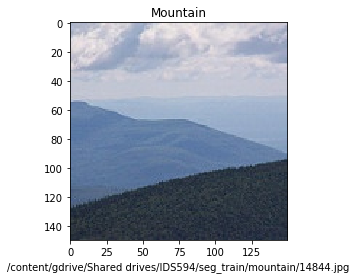

In [0]:
#requires tf eager execute
#Verify that image is sized correctly
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(img_path)
plt.title(label_names[label].title())
print()

In [0]:
#Create tensorflow dataset object from all_image_paths
#These objects behave very differently from other python objects, so expect issues
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print(type(all_image_paths))
print(type(path_ds))
print(path_ds.make_one_shot_iterator().get_next()) # depreciated, see for loop for new way to do this

for i in path_ds.take(1):
  print(i)

# Below is to display dataset info without eager execute enabled

#tensor = path_ds.make_one_shot_iterator().get_next()
#with tf.Session() as session:
#  print(session.run(tensor))

W0804 16:50:35.304919 139792834004864 deprecation.py:323] From <ipython-input-22-ef31e4c8828d>:4: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


<class 'list'>
<class 'tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter'>
tf.Tensor(b'/content/gdrive/Shared drives/IDS594/seg_train/mountain/14844.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/Shared drives/IDS594/seg_train/mountain/14844.jpg', shape=(), dtype=string)


In [0]:
# Investigate how tf dataset object displays via shapes and types:
# Here we see that path_ds is a dataset object composed of a list of strings
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

W0804 16:50:38.053926 139792834004864 deprecation.py:323] From <ipython-input-23-2a9400bc986b>:1: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0804 16:50:38.065995 139792834004864 deprecation.py:323] From <ipython-input-23-2a9400bc986b>:2: DatasetV1.output_types (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [0]:
# AUTOTUNE helps with CPU allocation for pulling data from a dataset object
# see interleave method of dataset object, num_parallel calls arg
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset

# Otherwise, this runs the user defined load and preprocess functions on
# all of the paths stored in path_ds, creating a dataset object containing
# all of the image data
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

# As before for path, we investigate the new structure
print('shape: ', repr(image_ds.output_shapes))
print('type: ', image_ds.output_types)
print()
print(image_ds)

# Notice that dataset contains 150x150 matrix with a 3 value tuple at each position
# all of the stored values are float32. ie this is a tf dataset representing
# 150x150 pixel images with 3 RGB values per pixel

shape:  TensorShape([Dimension(150), Dimension(150), Dimension(3)])
type:  <dtype: 'float32'>

<DatasetV1Adapter shapes: (150, 150, 3), types: tf.float32>


In [0]:
# Investigate the top left pixel of the first image in the dataset
print(image_ds.make_one_shot_iterator().get_next()[0,0])

tf.Tensor([0.69803923 0.7411765  0.8117647 ], shape=(3,), dtype=float32)


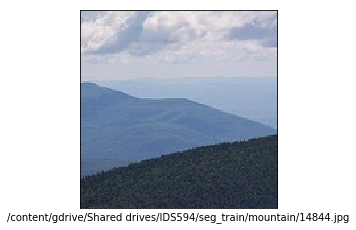

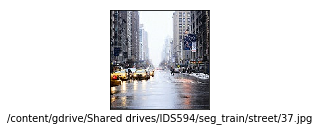

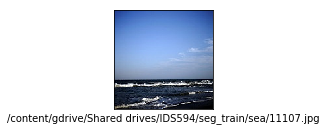

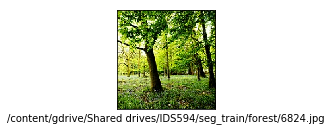

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(all_image_paths[n])
  plt.show()

In [0]:
# Create dataset object for labels from list of labels
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
print(label_ds)
print(label_ds.make_one_shot_iterator().get_next())
for i in label_ds.take(1): print(i)

<DatasetV1Adapter shapes: (), types: tf.int64>
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [0]:
# Print first 4 label names. Notice that they match pictures above
for label in label_ds.take(4):
  print(label_names[label.numpy()])

mountain
street
sea
forest


In [0]:
#the datasets and labels are in the same order so just zip them together to get a dataset of (image, label) pairs.
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [0]:
print(image_label_ds)
image, label = image_label_ds.make_one_shot_iterator().get_next()
print(image[0,0]) # extract top left pixel from first image
print(label) # extract label for first image

for image, label in image_label_ds.take(1):
  print(image[0,0]) # extract top left pixel from first image
  print(label) # extract label for first image

<DatasetV1Adapter shapes: ((150, 150, 3), ()), types: (tf.float32, tf.int64)>
tf.Tensor([0.69803923 0.7411765  0.8117647 ], shape=(3,), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([0.69803923 0.7411765  0.8117647 ], shape=(3,), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)


from tensorflow tutorial I used to get this far:
Basic methods for training

To train a model with this dataset you will want the data:

To be well shuffled.
To be batched.
To repeat forever.
To have batches available as soon as possible.

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count, seed=0)
ds_prefetch = ds.repeat() # enables repeat of dataset, currently no repeating
ds_prefetch = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds_prefetch = ds.prefetch(buffer_size=AUTOTUNE)
ds_prefetch

W0804 16:51:01.340079 139792834004864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<DatasetV1Adapter shapes: ((150, 150, 3), ()), types: (tf.float32, tf.int64)>

https://github.com/tensorflow/tensorflow/issues/18642
Random NN load/preprocess/model code to refer to

Shifting to lecture 4 process now that the train data is labled, tensorized and standardized

In [0]:
#Create validation set (train and val each contain the image data and the labels)
data = image_label_ds
train_size = round(image_count*.7)
print(train_size)
train = data.take(train_size) # First 70% of  examples for training
val = data.skip(train_size) # remaining examples for validation


9824


In [0]:
# copied from lecture 6 notes
# This only works if you don't run in eager execution mode - ie don't run second cell in this book
# doing this will cause lots of errors in the other cells, but the errors are all cosmetic
# TO DO - create separate book to just create data and run model w/o all the investigation in eager mode

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid')) # changed from 1 to 6

RuntimeError: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# From lecture 6 notes
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0728 21:40:23.093540 140325431158656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# TO DO - use preprocessing stuff in lecture 6 notes to allow use of her fit code

# You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
#in mini-batches of 512 samples. At the same time, you’ll monitor loss 
#and accuracy on the 10,000 samples that you set apart. 
#You do so by passing the validation data as the validation_data argument.
history = model.fit(train,
                    epochs=10,
                    batch_size=256,
                    validation_data=val)

NameError: ignored

In [0]:
# Display count of files in each created dir to verify contents
from pathlib import Path
base_dir = Path(path,'full_data')
data_root = Path(path,'seg_train')

train_dir = Path(base_dir, 'train')
validation_dir = Path(base_dir, 'validation')
test_dir = Path(base_dir, 'test')


path = '/content/gdrive/Shared drives/IDS594/'

label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())

print(train_dir)
for label in label_names:
  print(label, 'train images:', len(list(Path(train_dir,label).iterdir())))
print()
print(validation_dir)
for label in label_names:
  print(label, 'validation images:', len(list(Path(validation_dir,label).iterdir())))
print()
print(test_dir)
for label in label_names:
  print(label, 'test images:', len(list(Path(test_dir,label).iterdir())))

/content/gdrive/Shared drives/IDS594/full_data/train
buildings train images: 1560
forest train images: 1629
glacier train images: 1666
mountain train images: 1732
sea train images: 1586
street train images: 1657

/content/gdrive/Shared drives/IDS594/full_data/validation
buildings validation images: 638
forest validation images: 642
glacier validation images: 738
mountain validation images: 780
sea validation images: 688
street validation images: 725

/content/gdrive/Shared drives/IDS594/full_data/test
buildings test images: 437
forest test images: 474
glacier test images: 553
mountain test images: 525
sea test images: 510
street test images: 465
